# Exploring Meta-T Tetris data from Lindstedt and Gray (2015; 2019)
-------

### Notes on data 

- Download @ https://osf.io/78ebg/
- Three files:
    - "eps" describes the games of 241 participants at the episodic level (behavioural data and scores at each zoid)
    - "gms" provides summary stats (e.g., score, zoid sequence) for each game played in "eps"
    - "quals" includes episodic and summary data for tournament qualifier games played by 44 participants
- All variables described in 2017 paper by Sibert, Lindstedt, and Gray; doi number 10.1111/tops.12225
    - 85 columns in "eps"
    - 15 columns in "gms"
    - 89 columns in "quals"

Import libraries

In [1]:
import os
import sys
import socket

from modules.dim_reduction import *
from modules.visualization import *
from modules.features import *

Import data

In [2]:
def load_data(data_path='data'):
    
    eps = pd.read_csv(os.path.join(data_path, 'eps_15.tsv'), header=0, sep='\t', low_memory=False)
    gms = pd.read_csv(os.path.join(data_path, 'gms_15.tsv'), header=0, sep='\t', low_memory=False)
    quals = pd.read_csv(os.path.join(data_path, 'quals_2017.tsv'), header=0, sep='\t', low_memory=False)
    
    return eps, gms, quals
    
eps, gms, quals = load_data()

### Overview of data sets

In [3]:
eps.head()

,ts,event_type,SID,ECID,session,game_type,game_number,episode_number,level,score,lines_cleared,curr_zoid,next_zoid,danger_mode,rots,trans,path_length,min_rots,min_trans,min_path,min_rots_diff,min_trans_diff,min_path_diff,u_drops,s_drops,prop_u_drops,initial_lat,drop_lat,avg_lat,tetrises_game,tetrises_level,zoid_rot,zoid_col,zoid_row,all_diffs,all_ht,all_trans,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cleared,col_trans,column_9,cuml_cleared,cuml_eroded,cuml_wells,d_all_ht,d_max_ht,d_mean_ht,d_pits,deep_wells,eroded_cells,full_cells,jaggedness,landing_height,lumped_pits,matches,max_diffs,max_ht,max_ht_diff,max_well,mean_ht,mean_pit_depth,min_ht,min_ht_diff,move_score,nine_filled,pattern_div,pit_depth,pit_rows,pits,row_trans,tetris,tetris_progress,weighted_cells,wells,criterion,crit_game,study
1,78.497857,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,0,0,16,0,O,S,False,0,4,4,0,4,4,0,0,0,17,2,0.894737,724,2083,416.600000,0,0,0,0,2,-2,4,4,0,-2,0,0,0,0,0,0,0,0,2,0,0,0,0,4,2,0.4,0,0,0,4,2,0,0,4,0,2,1.6,0,0.4,0.0,0,0.4,0,0,2,0,0,0,2,0,0,6,0,6042,True,TS1
2,88.278321,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,1,0,24,0,S,O,False,1,7,8,1,3,4,0,4,4,8,10,0.444444,606,4671,505.545455,0,0,1,1,4,-2,9,10,2,-1,-3,0,0,0,0,0,0,0,4,0,0,0,3,5,2,0.5,1,2,0,8,6,1,1,2,2,4,3.1,2,0.9,2.0,0,0.9,0,0,4,2,1,1,6,0,0,18,2,6042,True,TS1
3,92.966827,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,2,0,38,0,O,J,False,0,10,10,0,4,4,0,6,6,15,4,0.789474,701,4061,369.181818,0,0,0,8,2,0,13,14,2,-1,-3,0,0,0,0,2,0,0,6,2,0,0,3,4,0,0.4,0,2,0,12,8,0,1,4,2,4,2.7,2,1.3,2.0,0,1.3,0,0,5,2,1,1,8,0,0,24,2,6042,True,TS1
4,99.371939,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,3,0,51,0,J,S,False,1,4,5,1,1,2,0,3,3,13,6,0.684211,902,2089,621.000000,0,0,1,2,3,0,16,14,2,-1,0,-3,0,0,0,2,0,0,6,2,0,0,3,3,0,0.3,-1,2,0,16,8,0,0,6,2,4,2.4,2,1.6,0.0,0,1.6,0,0,6,0,0,0,8,0,0,31,2,6042,True,TS1
5,106.997525,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,4,0,58,0,S,O,False,3,3,6,1,3,4,2,0,2,8,8,0.500000,857,6591,820.888889,0,0,1,1,6,0,20,18,4,-1,-2,-3,0,0,0,2,0,0,6,2,0,0,10,4,2,0.4,0,4,0,20,12,3,0,3,4,6,4.0,4,2.0,0.0,0,2.0,0,0,6,0,0,0,12,0,0,51,4,6042,True,TS1


In [4]:
quals = quals.sort_values(by=['SID', 'session', 'game_number', 'episode_number']) # reorder rows by participant ID, game number, followed by zoid 
quals = quals.reset_index(drop=True)
quals.head()

,year,SID,ts,event_type,session,game_type,game_number,episode_number,level,score,lines_cleared,evt_data2,curr_zoid,next_zoid,danger_mode,rots,trans,path_length,min_rots,min_trans,min_path,min_rots_diff,min_trans_diff,min_path_diff,u_drops,s_drops,prop_u_drops,initial_lat,drop_lat,avg_lat,tetrises_game,tetrises_level,delaying,dropping,zoid_rot,zoid_col,zoid_row,all_diffs,all_ht,all_trans,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cleared,col_trans,column_9,cuml_cleared,cuml_eroded,cuml_wells,d_all_ht,d_max_ht,d_mean_ht,d_pits,deep_wells,eroded_cells,full_cells,jaggedness,landing_height,lumped_pits,matches,max_diffs,max_ht,max_ht_diff,max_well,mean_ht,mean_pit_depth,min_ht,min_ht_diff,move_score,nine_filled,pattern_div,pit_depth,pit_rows,pits,row_trans,tetris,tetris_progress,weighted_cells,wells,tnmt_rank,tnmt_seed,tnmt_note,HQS
0,2014,1,19.813191,EP_SUMM,2014-3-1_13-4-49,qualifier,1,0,0,17,0,NaN,O,Z,False,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,18.0,1.0,0.947368,395.0,799.0,324.500000,0.0,0.0,NaN,NaN,0.0,0.0,2.0,-2.0,4.0,4.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,4.0,0.0,2.0,1.6,0.0,0.4,0.0,0.0,0.4,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,NaN,NaN,NaN,4043.0
1,2014,1,22.561384,EP_SUMM,2014-3-1_13-4-49,qualifier,1,1,0,34,0,NaN,Z,T,False,0.0,6.0,6.0,0.0,4.0,4.0,0.0,2.0,2.0,18.0,1.0,0.947368,47.0,147.0,199.615385,0.0,0.0,NaN,NaN,0.0,7.0,2.0,-1.0,9.0,11.0,0.0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,-1.0,0.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,0.0,1.0,3.0,2.0,2.0,1.1,1.0,0.9,1.0,0.0,0.9,0.0,0.0,5.0,1.0,1.0,1.0,5.0,0.0,0.0,12.0,1.0,NaN,NaN,NaN,4043.0
2,2014,1,25.565171,EP_SUMM,2014-3-1_13-4-49,qualifier,1,2,0,53,0,NaN,T,I,False,2.0,3.0,5.0,2.0,2.0,4.0,0.0,1.0,1.0,19.0,1.0,0.950000,51.0,346.0,209.000000,0.0,0.0,NaN,NaN,2.0,5.0,2.0,-1.0,12.0,12.0,0.0,-2.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,6.0,1.0,2.0,0.8,1.0,1.2,0.0,0.0,1.2,0.0,0.0,6.0,0.0,0.0,0.0,5.0,0.0,0.0,17.0,1.0,NaN,NaN,NaN,4043.0
3,2014,1,27.965636,EP_SUMM,2014-3-1_13-4-49,qualifier,1,3,0,69,0,NaN,I,Z,False,1.0,4.0,5.0,1.0,4.0,5.0,0.0,0.0,0.0,17.0,1.0,0.944444,51.0,51.0,237.375000,0.0,0.0,NaN,NaN,1.0,9.0,5.0,3.0,16.0,14.0,0.0,-2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,7.0,1.0,0.0,6.0,3.0,5.0,3.4,0.0,1.6,0.0,0.0,1.6,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0,31.0,0.0,NaN,NaN,NaN,4043.0
4,2014,1,30.713786,EP_SUMM,2014-3-1_13-4-49,qualifier,1,4,0,85,0,NaN,Z,I,False,1.0,5.0,6.0,1.0,1.0,2.0,0.0,4.0,4.0,17.0,1.0,0.944444,246.0,246.0,234.700000,0.0,0.0,NaN,NaN,1.0,5.0,4.0,3.0,20.0,18.0,0.0,-2.0,0.0,0.0,3.0,1.0,-2.0,0.0,3.0,0.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,11.0,1.0,0.0,3.0,3.0,5.0,3.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,11.0,0.0,0.0,43.0,0.0,NaN,NaN,NaN,4043.0


In [5]:
gms.head()

,ts,event_type,SID,ECID,session,game_type,game_number,episode_number,level,score,lines_cleared,completed,game_duration,avg_ep_duration,zoid_sequence,criterion,crit_game,study
1,668.113751,GAME_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,113,3,4006,31,NaN,589.615894,5.217840,"[\O\,\S\,\O\,\J\,\S\,\O\,\J\,\T\,\L\,\T\,\L\,\...",6042,True,TS1
2,958.883883,GAME_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,2,58,0,677,7,NaN,280.504167,4.836279,"[\I\,\L\,\I\,\S\,\Z\,\T\,\O\,\T\,\S\,\L\,\I\,\...",6042,False,TS1
3,1829.488090,GAME_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,3,201,6,13565,68,NaN,849.775758,4.227740,"[\T\,\L\,\I\,\O\,\S\,\L\,\O\,\S\,\L\,\I\,\O\,\...",6042,True,TS1
4,2215.288369,GAME_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,4,73,1,1536,16,NaN,370.534740,5.075818,"[\T\,\I\,\Z\,\O\,\S\,\J\,\L\,\I\,\J\,\I\,\L\,\...",6042,False,TS1
5,2742.999405,GAME_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,5,110,2,3453,29,NaN,512.036498,4.654877,"[\Z\,\I\,\O\,\I\,\S\,\I\,\J\,\I\,\T\,\Z\,\L\,\...",6042,True,TS1


### Dimensionality reduction of performance variables

Concentrating our efforts on the "eps" data set, we try to identify salient and independent aspects of performance in Tetris by collapsing our features via ML

In [6]:
# How many players do we have?
n = eps['SID'].nunique()
print(f'We have {n} participants in our "eps" data set')

We have 241 participants in our "eps" data set


In [7]:
eps.head()

,ts,event_type,SID,ECID,session,game_type,game_number,episode_number,level,score,lines_cleared,curr_zoid,next_zoid,danger_mode,rots,trans,path_length,min_rots,min_trans,min_path,min_rots_diff,min_trans_diff,min_path_diff,u_drops,s_drops,prop_u_drops,initial_lat,drop_lat,avg_lat,tetrises_game,tetrises_level,zoid_rot,zoid_col,zoid_row,all_diffs,all_ht,all_trans,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cleared,col_trans,column_9,cuml_cleared,cuml_eroded,cuml_wells,d_all_ht,d_max_ht,d_mean_ht,d_pits,deep_wells,eroded_cells,full_cells,jaggedness,landing_height,lumped_pits,matches,max_diffs,max_ht,max_ht_diff,max_well,mean_ht,mean_pit_depth,min_ht,min_ht_diff,move_score,nine_filled,pattern_div,pit_depth,pit_rows,pits,row_trans,tetris,tetris_progress,weighted_cells,wells,criterion,crit_game,study
1,78.497857,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,0,0,16,0,O,S,False,0,4,4,0,4,4,0,0,0,17,2,0.894737,724,2083,416.600000,0,0,0,0,2,-2,4,4,0,-2,0,0,0,0,0,0,0,0,2,0,0,0,0,4,2,0.4,0,0,0,4,2,0,0,4,0,2,1.6,0,0.4,0.0,0,0.4,0,0,2,0,0,0,2,0,0,6,0,6042,True,TS1
2,88.278321,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,1,0,24,0,S,O,False,1,7,8,1,3,4,0,4,4,8,10,0.444444,606,4671,505.545455,0,0,1,1,4,-2,9,10,2,-1,-3,0,0,0,0,0,0,0,4,0,0,0,3,5,2,0.5,1,2,0,8,6,1,1,2,2,4,3.1,2,0.9,2.0,0,0.9,0,0,4,2,1,1,6,0,0,18,2,6042,True,TS1
3,92.966827,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,2,0,38,0,O,J,False,0,10,10,0,4,4,0,6,6,15,4,0.789474,701,4061,369.181818,0,0,0,8,2,0,13,14,2,-1,-3,0,0,0,0,2,0,0,6,2,0,0,3,4,0,0.4,0,2,0,12,8,0,1,4,2,4,2.7,2,1.3,2.0,0,1.3,0,0,5,2,1,1,8,0,0,24,2,6042,True,TS1
4,99.371939,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,3,0,51,0,J,S,False,1,4,5,1,1,2,0,3,3,13,6,0.684211,902,2089,621.000000,0,0,1,2,3,0,16,14,2,-1,0,-3,0,0,0,2,0,0,6,2,0,0,3,3,0,0.3,-1,2,0,16,8,0,0,6,2,4,2.4,2,1.6,0.0,0,1.6,0,0,6,0,0,0,8,0,0,31,2,6042,True,TS1
5,106.997525,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,4,0,58,0,S,O,False,3,3,6,1,3,4,2,0,2,8,8,0.500000,857,6591,820.888889,0,0,1,1,6,0,20,18,4,-1,-2,-3,0,0,0,2,0,0,6,2,0,0,10,4,2,0.4,0,4,0,20,12,3,0,3,4,6,4.0,4,2.0,0.0,0,2.0,0,0,6,0,0,0,12,0,0,51,4,6042,True,TS1


### Prepare dataframe for factor analysis - drop general and game summary outputs

In [8]:
short_eps = eps.drop(columns=summary_features+game_state_features)
short_eps.head()

,rots,trans,path_length,min_rots,min_trans,min_path,min_rots_diff,min_trans_diff,min_path_diff,u_drops,s_drops,prop_u_drops,initial_lat,drop_lat,avg_lat,all_diffs,all_ht,all_trans,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cleared,col_trans,column_9,cuml_cleared,cuml_eroded,cuml_wells,d_all_ht,d_max_ht,d_mean_ht,d_pits,deep_wells,eroded_cells,full_cells,jaggedness,landing_height,lumped_pits,matches,max_diffs,max_ht,max_ht_diff,max_well,mean_ht,mean_pit_depth,min_ht,min_ht_diff,move_score,nine_filled,pattern_div,pit_depth,pit_rows,pits,row_trans,tetris,tetris_progress,weighted_cells,wells
1,0,4,4,0,4,4,0,0,0,17,2,0.894737,724,2083,416.600000,-2,4,4,0,-2,0,0,0,0,0,0,0,0,2,0,0,0,0,4,2,0.4,0,0,0,4,2,0,0,4,0,2,1.6,0,0.4,0.0,0,0.4,0,0,2,0,0,0,2,0,0,6,0
2,1,7,8,1,3,4,0,4,4,8,10,0.444444,606,4671,505.545455,-2,9,10,2,-1,-3,0,0,0,0,0,0,0,4,0,0,0,3,5,2,0.5,1,2,0,8,6,1,1,2,2,4,3.1,2,0.9,2.0,0,0.9,0,0,4,2,1,1,6,0,0,18,2
3,0,10,10,0,4,4,0,6,6,15,4,0.789474,701,4061,369.181818,0,13,14,2,-1,-3,0,0,0,0,2,0,0,6,2,0,0,3,4,0,0.4,0,2,0,12,8,0,1,4,2,4,2.7,2,1.3,2.0,0,1.3,0,0,5,2,1,1,8,0,0,24,2
4,1,4,5,1,1,2,0,3,3,13,6,0.684211,902,2089,621.000000,0,16,14,2,-1,0,-3,0,0,0,2,0,0,6,2,0,0,3,3,0,0.3,-1,2,0,16,8,0,0,6,2,4,2.4,2,1.6,0.0,0,1.6,0,0,6,0,0,0,8,0,0,31,2
5,3,3,6,1,3,4,2,0,2,8,8,0.500000,857,6591,820.888889,0,20,18,4,-1,-2,-3,0,0,0,2,0,0,6,2,0,0,10,4,2,0.4,0,4,0,20,12,3,0,3,4,6,4.0,4,2.0,0.0,0,2.0,0,0,6,0,0,0,12,0,0,51,4


Bartlett's test for sphericity

In [9]:
chi, p = calculate_bartlett_sphericity(short_eps)
print(f'{chi} and {p}')

nan and nan


/home/ozvar/.local/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:118: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


Kaiser-Meyer-Olkin Test

In [10]:
kmo_all,kmo_model=calculate_kmo(short_eps)
print(kmo_model)

/home/ozvar/.local/lib/python3.9/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.7479674673501773


There are 6 factors with an eigenvalue above 1


/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


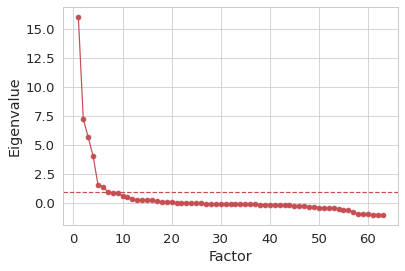

In [11]:
ev, loadings, fa = factor_analyse(short_eps)

ev_above_1 = [i for i in ev if i > 1]
print(f'There are {len(ev_above_1)} factors with an eigenvalue above 1')

scree_plot(ev)

In [12]:
ev, loadings, fa = factor_analyse(short_eps, 
                                  n_factors=6,
                                  rotation=None, 
                                  method='minres',
                                  cutoff=0.4, 
                                  display_loadings=False)

/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


In [21]:
ev, loadings, fa = factor_analyse(short_eps,
                                  n_factors=6, 
                                  rotation='varimax',
                                  method='minres',
                                  cutoff=0.4,
                                  display_loadings=True)

/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


,1,2,3,4,5,6
pit_rows,0.972489,,,,,
col_trans,0.946410,,,,,
pits,0.945139,,,,,
lumped_pits,0.941379,,,,,
pit_depth,0.939356,,,,,
min_ht,0.938460,,,,,
mean_ht,0.936885,,,,,
weighted_cells,0.910929,,,,,
landing_height,0.874598,,,,,
max_ht,0.854805,,,,,


## Factor analyse restricted feature set taken from Lindstedt and Gray (2019)

In [58]:
short_eps = eps[lindstedt_2019_features]

Bartlett's test for sphericity

In [50]:
chi, p = calculate_bartlett_sphericity(short_eps)
print(f'{chi} and {p}')

12567900.806011992 and 0.0


Kaiser-Meyer-Olkin Test

In [53]:
kmo_all,kmo_model=calculate_kmo(short_eps)
print(kmo_model)

0.8194099155902443


In [62]:
ev, loadings, fa = factor_analyse(short_eps, 
                                  n_factors=6,
                                  rotation=None, 
                                  method='minres',
                                  cutoff=0.4)

/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


Check eigenvalues

There are 4 factors with an eigenvalue above 1


/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


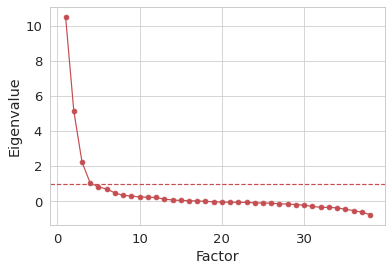

In [63]:
ev, loadings, fa = factor_analyse(short_eps)

ev_above_1 = [i for i in ev if i > 1]
print(f'There are {len(ev_above_1)} factors with an eigenvalue above 1')

scree_plot(ev)

In [34]:
ev, loadings, fa = factor_analyse(short_eps,
                                  n_factors=4, 
                                  rotation='varimax',
                                  method='minres',
                                  cutoff=0.4,
                                  display_loadings=True)

/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


,1,2,3,4
pit_rows,0.972402,,,
col_trans,0.944668,,,
pits,0.942723,,,
mean_ht,0.939783,,,
lumped_pits,0.937948,,,
pit_depth,0.936487,,,
min_ht,0.935331,,,
weighted_cells,0.911931,,,
landing_height,0.876951,,,
max_ht,0.865227,,,


### Same feature set, this time conduct PCA

In [ ]:
# standardise 
scaled_eps = StandardScaler().fit_transform(short_eps)
scaled_eps = pd.DataFrame(scaled_eps, columns=short_eps.columns)

In [44]:
loadings, pca = princomp(short_eps, 
                         n_components=4, 
                         cutoff=0.1,
                         display_loadings=True)

,1,2,3,4
mean_ht,0.295651,,,
weighted_cells,0.288892,,,
row_trans,0.288818,,,
max_ht,0.287302,,,
landing_height,0.284591,,,
pit_rows,0.279097,,,
pit_depth,0.273023,,,
col_trans,0.271202,,,
pits,0.271129,,,
lumped_pits,0.266690,,,


### Factor extraction

In [26]:
test = StandardScaler().fit_transform(short_eps)

In [43]:
test = pd.DataFrame(pca.fit_transform(test), columns=['Disarray', 'Deep Well Prep', 'Decision-Action Latency'])
test.head()

,Disarray,Deep Well Prep,Decision-Action Latency
0,-5.131577,-1.588590,-0.662423
1,-3.558529,0.018476,2.027629
2,-3.673459,-0.050677,1.522954
3,-3.692233,-0.082426,-0.011886
4,-2.576105,1.939854,2.387228
